# 필수과제 4
- 예시 데이터를 가지고 실제 상관성 등을 분석해서
- 각 변수들의 특징과, 두 변수 간의 관계 등을 비교해서 데이터 시각화에 대한 해석을 주석처리 하기

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [30]:
df = pd.read_csv('wine_test.csv')

In [31]:
df

,Unnamed: 0,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,NaN,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [32]:
df.isna().sum()

Unnamed: 0                      0
alcohol                         2
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            5
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

- alcohol
- nonflavanoid_phenols

In [33]:
df[df['alcohol'].isnull()] # alcohol에서 결측치 있는 행 값 찾기

,Unnamed: 0,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
1,1,NaN,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
8,8,NaN,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,0


In [34]:
df[df['nonflavanoid_phenols'].isnull()] # nonflavanoid_phenols에서 결측치 있는 행 값 찾기

,Unnamed: 0,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
70,70,12.29,1.61,2.21,20.4,103,1.10,1.02,NaN,1.46,3.05,0.906,1.82,870,1
95,95,12.47,1.52,2.20,19.0,162,2.50,2.27,NaN,3.28,2.60,1.160,2.63,937,1
102,102,12.34,2.45,2.46,21.0,98,2.56,2.11,NaN,1.31,2.80,0.800,3.38,438,1
103,103,11.82,1.72,1.88,19.5,86,2.50,1.64,NaN,1.42,2.06,0.940,2.44,415,1
120,120,11.45,2.40,2.42,20.0,96,2.90,2.79,NaN,1.83,3.25,0.800,3.39,625,1


In [35]:
#결측치 -> 평균값으로 대체
df['alcohol'].fillna(df['alcohol'].mean(), inplace=True)
df['nonflavanoid_phenols'].fillna(df['nonflavanoid_phenols'].mean(), inplace=True)

In [36]:
df.isna().sum() #확인

Unnamed: 0                      0
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

- alcohol: 알코올 도수
- malic_acid: 말산 또는 사과산
- ash: 모르겠음
- alcalinity_of_ash: ahs의 산성도(알칼리도)
- magnesium: 마그네슘
- total_pheonls: 페놀
- flavanoids: 플라보노이드 식물의 세포를 보호하는 물질
- nonflavanoid_phenols: 플라보노이드가 아닌 페놀
- proanthocyanins: 프로안토시아니딘
- color_intensity: 색의 강도
- hue:빛깔
- od280/od315_of_diluted_wines: 희석 와인의 od280에 대한 od315의 비율
- proline: 프롤린
- class: 등급

Text(0, 0.5, 'total_phenols')

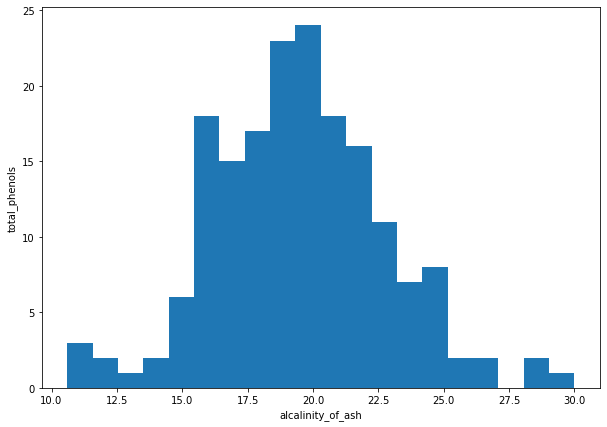

In [37]:
fig = plt.figure(figsize=(10,7))

ax = fig.add_subplot(111)
freq, _ ,_ = ax.hist(df['alcalinity_of_ash'], bins=20)
ax.set_xlabel('alcalinity_of_ash')
ax.set_ylabel('total_phenols')

#alcalinity_of_ash와 total_phenols의 관계
# 주로 중앙에 모여있음

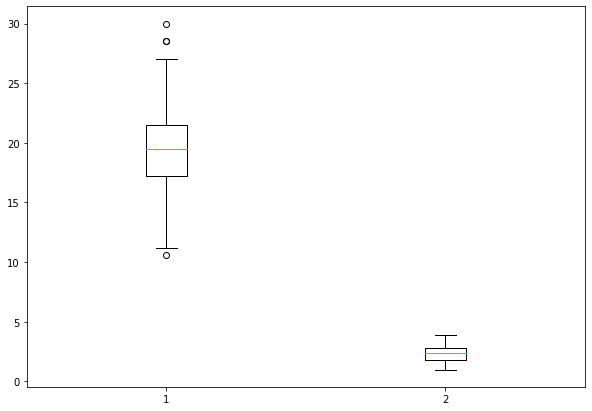

In [38]:
plt.figure(figsize = (10,7))
plt.boxplot([df['alcalinity_of_ash'], df['total_phenols']])
plt.show()

#alcalinity_of_ash
#이상치가 3개 존재
#거의 중앙에 위치

#total_phenols
#이상치 존재하지 않음
#폽이 좁음

Text(0, 0.5, 'total_phenols')

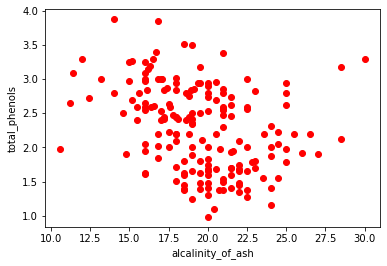

In [39]:
plt.scatter(df['alcalinity_of_ash'], df['total_phenols'], c='red')
plt.xlabel('alcalinity_of_ash')
plt.ylabel('total_phenols')

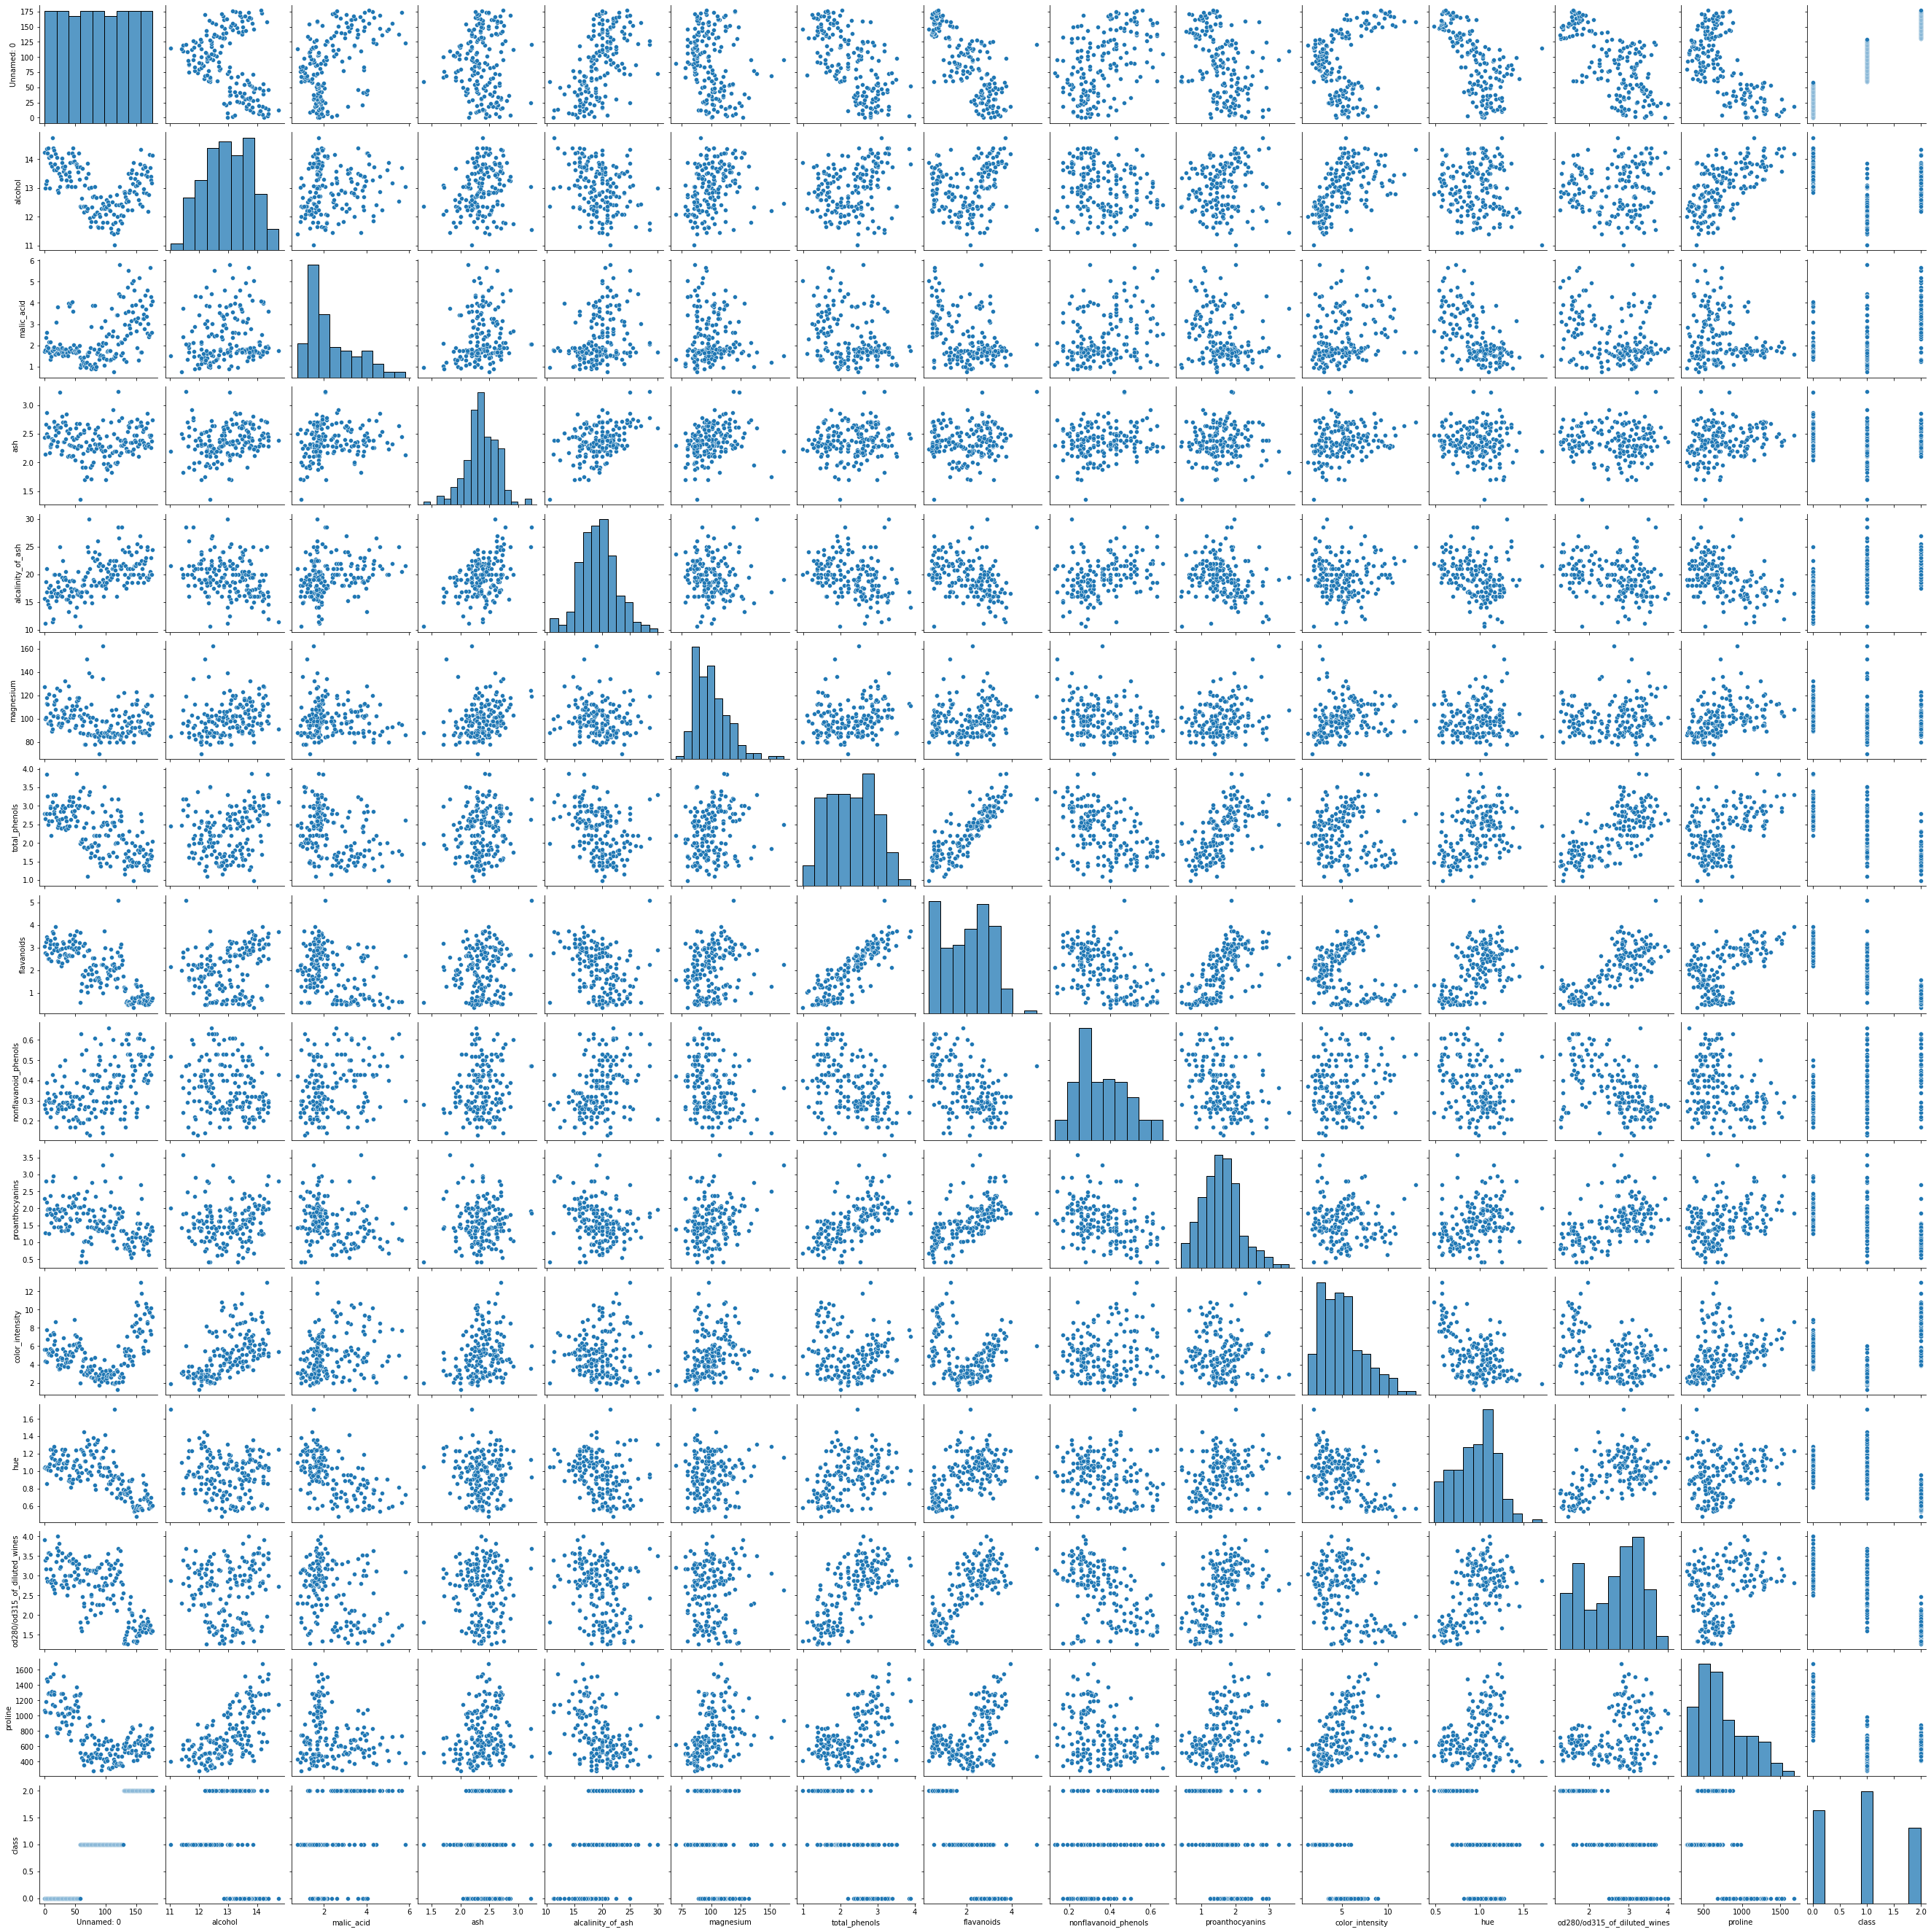

In [40]:
import seaborn as sns
sns.pairplot(df)

In [41]:
# 넘파이로 쉽게 구할 수 있다 (상관계수)
np.corrcoef(df['alcalinity_of_ash'], df['total_phenols'])

#음의 상관관계를 보인다
#즉 하나의 변수 값이 증가하면 다른 변수는 감소한다는 의미이다

array([[ 1.        , -0.32111332],
       [-0.32111332,  1.        ]])

In [42]:
#데이터프레임으로 상관계수 만들기
df.corr()

,Unnamed: 0,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
Unnamed: 0,1.000000,-0.345423,0.487630,-0.016086,0.563955,-0.232275,-0.650084,-0.758609,0.484896,-0.406681,0.255444,-0.662205,-0.697445,-0.644330,0.938006
alcohol,-0.345423,1.000000,0.104654,0.225250,-0.289776,0.277314,0.282087,0.226888,-0.154615,0.130710,0.554168,-0.080394,0.067406,0.639596,-0.315583
malic_acid,0.487630,0.104654,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292423,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,-0.016086,0.225250,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186738,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,0.563955,-0.289776,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.362566,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,-0.232275,0.277314,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.248472,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,-0.650084,0.282087,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.446808,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,-0.758609,0.226888,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.535811,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,0.484896,-0.154615,0.292423,0.186738,0.362566,-0.248472,-0.446808,-0.535811,1.000000,-0.359954,0.135379,-0.263055,-0.499922,-0.311972,0.489813
proanthocyanins,-0.406681,0.130710,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.359954,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
